In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

citydf = pd.read_csv(city_data_to_load)
ridedf = pd.read_csv(ride_data_to_load)
mergedf = pd.merge(ridedf, citydf, on="city", how="left")
mergedf.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2018 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2018 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2018 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2018 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2018 4:28,34.58,3.908450e+12,46,Urban


In [4]:
urbandf = mergedf.loc[(mergedf['type'] == "Urban")]
suburbandf = mergedf.loc[(mergedf['type'] == "Suburban")]
ruraldf = mergedf.loc[(mergedf['type'] == "Rural")]

## Bubble Plot of Ride Sharing Data

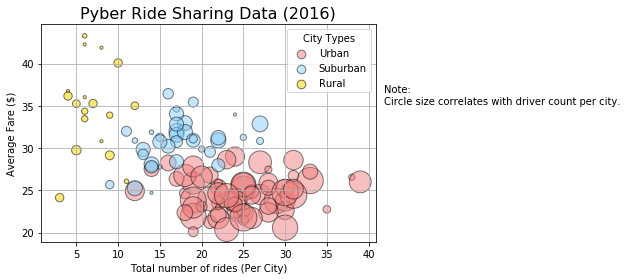

In [84]:
urbangroup = urbandf.groupby(by="city")
suburbangroup = suburbandf.groupby(by="city")
ruralgroup = ruraldf.groupby(by="city")

urban_ridecount = urbangroup["ride_id"].count()
suburban_ridecount = suburbangroup["ride_id"].count()
rural_ridecount = ruralgroup["ride_id"].count()

urban_avgfare = urbangroup["fare"].mean()
suburban_avgfare = suburbangroup["fare"].mean()
rural_avgfare = ruralgroup["fare"].mean()

urban_num_drivers = urbangroup["driver_count"].mean()
suburban_num_drivers = suburbangroup["driver_count"].mean()
rural_num_drivers = ruralgroup["driver_count"].mean()

plt.scatter(urban_ridecount, urban_avgfare ,s=urban_num_drivers*10,
            marker ='o', facecolors ="lightcoral", edgecolors='black',alpha = 0.5, label="Urban")

plt.scatter(suburban_ridecount, suburban_avgfare,s=suburban_num_drivers*10,
            marker ='o', facecolors ="lightskyblue", edgecolors='black',alpha = 0.5, label="Suburban")

plt.scatter(rural_ridecount, rural_avgfare,s=rural_num_drivers*10,
            marker ='o', facecolors ="gold", edgecolors='black',alpha = 0.55, label="Rural")


plt.title('Pyber Ride Sharing Data (2016)', fontsize=16)
plt.xlabel("Total number of rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)

legend = plt.legend(('Urban','Suburban', 'Rural'), title="City Types")
legend.legendHandles[0]._sizes = [75]
legend.legendHandles[1]._sizes = [75]
legend.legendHandles[2]._sizes = [75]

plt.figtext(.92,.60,"""Note:
Circle size correlates with driver count per city.""", wrap=True,
           verticalalignment='center_baseline', fontsize=10)

plt.savefig("Images/Pyber_Data.png")

In [94]:
plt.show()

## Total Fares by City Type

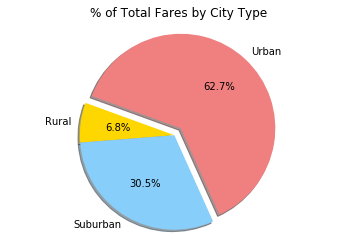

In [92]:
# Calculate Type Percents
mergebytype = mergedf.groupby(by="type")

fare_bytype = mergebytype["fare"].sum()
colors = ["Gold", "lightskyblue", "lightcoral"]
labels = ["Rural", "Suburban", "Urban"]
explode = [0 , 0, .1]

plt.pie(fare_bytype, colors=colors, labels=labels, explode=explode, autopct = "%1.1f%%", shadow=True, startangle=160)
plt.title("% of Total Fares by City Type")
plt.axis("equal")

plt.savefig("Images/Fare_bytype.png")

In [93]:
plt.show()

## Total Rides by City Type

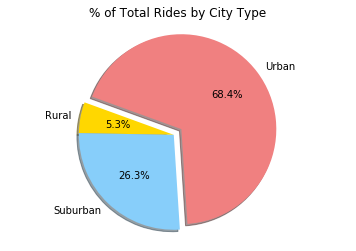

In [87]:
ride_bytype = mergebytype["ride_id"].count()


plt.pie(ride_bytype, colors=colors, labels=labels, explode=explode, autopct = "%1.1f%%", shadow=True, startangle=160)
plt.title("% of Total Rides by City Type")
plt.axis("equal")

plt.savefig("Images/Ride_bytype.png")

In [90]:
plt.show()

## Total Drivers by City Type

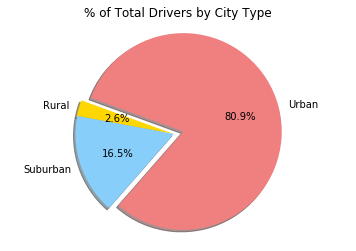

In [88]:
nodups = mergedf.drop_duplicates(subset='city', keep='first')
nodupbytype = nodups.groupby(by="type")
driverbytype = nodupbytype["driver_count"].sum()

plt.pie(driverbytype, colors=colors, labels=labels, explode=explode, autopct = "%1.1f%%", shadow=True, startangle=160)
plt.title("% of Total Drivers by City Type")
plt.axis("equal")
plt.savefig("Images/Driver_bytype.png")

In [89]:
# Show Figure
plt.show()